In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pd.set_option('display.max_columns', None)
%matplotlib inline 

In [29]:
#pip install dmba

In [30]:
df=pd.read_csv('/Users/zabihbuda/Desktop/York Universiy files/AI Fundamentals/week 1/ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0


In [31]:
print(df.shape)
print(df.isnull().sum())
print(df.columns)

(1436, 39)
Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64
Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
    

In [32]:
df_fuel_types=pd.get_dummies(df['Fuel_Type'])
df_fuel_types.head()


df=pd.concat([df, pd.get_dummies(df['Fuel_Type'])], axis=1)
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,CNG,Diesel,Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,False,True,False
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,False,True,False
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,False,True,False
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,False,True,False
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0,False,True,False


In [33]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar', 'CNG', 'Diesel',
       'Petrol'],
      dtype='object')

In [34]:
features=df[['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors',
       'Quarterly_Tax', 'Mfr_Guarantee',
       'Guarantee_Period', 
       'Airco', 'Automatic_airco', 'CD_Player',
        'Powered_Windows', 
       'Sport_Model', 'Tow_Bar', 'CNG', 'Diesel',
       'Petrol']]
target= df['Price']

In [63]:
X=features
y=target

X_train,  X_test,y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)

(1436, 17)
(1436,)
(1148, 17)
(1148,)


[8.35556617e-01 6.10622452e-02 3.98525933e-02 2.52537790e-03
 6.37396265e-03 1.16463458e-02 3.88633435e-03 2.59316889e-03
 4.99029267e-03 1.27229730e-02 3.86663314e-03 8.64803104e-03
 1.76084987e-03 3.54129133e-03 2.55773757e-04 4.32715028e-05
 6.74238497e-04]


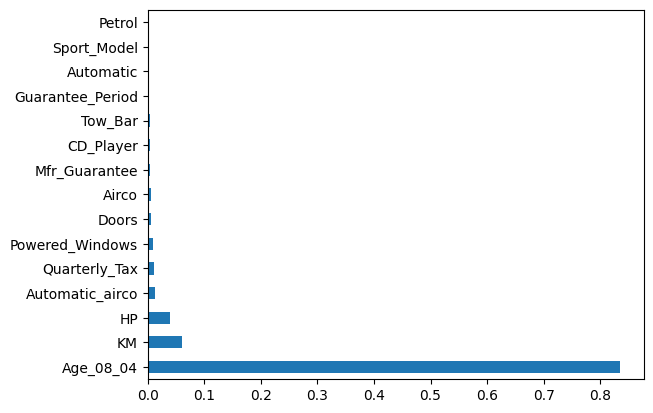

In [65]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)

print(model.feature_importances_)
feat_importance=pd.Series(model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

In [67]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: {:0.3f}'.format(accuracy))

Accuracy: 0.049


In [80]:
pip install estimators

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pympler: filename=Pympler-0.4.3-py3-none-any.whl size=154390 sha256=8de2e881f79b64db1749041ee2a2630b454fb69a441fb09dd8ee3e6ef4b821be
  Stored in directory: /Users/zabihbuda/Library/Caches/pip/wheels/c7/70/e0/1b32d9de3f6292e053238b8e0c238847b02851e01d602aa76f
  Created wheel for SQLAlchemy: filename=SQLAlchemy-1.0.15-cp39-cp39-macosx_12_0_x86_64.whl size=979235 sha256=de9b130a2c6781cc38b85d7ba1e86b8a4cb91032bfa3f333a8907ec6bdfa1e83
  Stored in directory: /Users/zab

In [81]:
import sklearn
from sklearn import ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor


from sklearn.ensemble import MetaEstimator

ImportError: cannot import name 'MetaEstimator' from 'sklearn.ensemble' (/usr/local/lib/python3.9/site-packages/sklearn/ensemble/__init__.py)

In [78]:




model_lgr=LogisticRegression()
Model_lr=LogisticRegression()
model_dt=DecisionTreeRegressor()

models_combined=MetaEstimator(model_dt, Model_lr, model_lgr)

models_combined.fit(X_train, y_train)
y_pred=models_combined.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: {:0.3f}'.format(accuracy))

NameError: name 'MetaEstimator' is not defined